## Jupyter notebook exploring historical S&P 500 performance

During initial setup we configure [matplotlib](https://matplotlib.org) for visualizations, load the data into a data frame using [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) and show the first few records.

In [28]:
%matplotlib inline
import pandas as pd
data_frame = pd.read_csv("data.csv")
data_frame.head(10)

,date,price,open,high,low,volume,change_percent
0,"Nov 14, 2019","3,096.63","3,090.75","3,098.20","3,083.26",-,0.08%
1,"Nov 13, 2019","3,094.04","3,084.18","3,098.06","3,078.80",-,0.07%
2,"Nov 12, 2019","3,091.84","3,089.28","3,102.61","3,084.73",-,0.16%
3,"Nov 11, 2019","3,087.01","3,080.33","3,088.33","3,075.82",-,-0.20%
4,"Nov 08, 2019","3,093.08","3,081.25","3,093.09","3,073.58",-,0.26%
5,"Nov 07, 2019","3,085.18","3,087.02","3,097.77","3,080.23",-,0.27%
6,"Nov 06, 2019","3,076.78","3,075.10","3,078.34","3,065.89",-,0.07%
7,"Nov 05, 2019","3,074.62","3,080.80","3,083.95","3,072.15",-,-0.12%
8,"Nov 04, 2019","3,078.27","3,078.96","3,085.20","3,074.87",-,0.37%
9,"Nov 01, 2019","3,066.91","3,050.72","3,066.95","3,050.72",-,0.97%


## Get info for the data (collection)

Now that we have a basic idea of how the data is structured lets get more info on the data frame to get an idea of data size, typing, etc.

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            5000 non-null   object
 1   price           5000 non-null   object
 2   open            5000 non-null   object
 3   high            5000 non-null   object
 4   low             5000 non-null   object
 5   volume          5000 non-null   object
 6   change_percent  5000 non-null   object
dtypes: object(7)
memory usage: 273.6+ KB


## Clean up data (preparation)

Let's clean up the data frame a bit so we are focused only on the data we care about. 

In [39]:
data_frame['date'] = pd.to_datetime(data_frame.date)
data_frame['price'] = pd.to_numeric(data_frame["price"].astype(str).str.replace(",",""))
data_frame = data_frame.drop(['volume', 'change_percent'], axis = 1, errors = 'ignore')
data_frame.set_index("date")
data_frame.head(10)

,date,price,open,high,low
0,2019-11-14,3096.63,"3,090.75","3,098.20","3,083.26"
1,2019-11-13,3094.04,"3,084.18","3,098.06","3,078.80"
2,2019-11-12,3091.84,"3,089.28","3,102.61","3,084.73"
3,2019-11-11,3087.01,"3,080.33","3,088.33","3,075.82"
4,2019-11-08,3093.08,"3,081.25","3,093.09","3,073.58"
5,2019-11-07,3085.18,"3,087.02","3,097.77","3,080.23"
6,2019-11-06,3076.78,"3,075.10","3,078.34","3,065.89"
7,2019-11-05,3074.62,"3,080.80","3,083.95","3,072.15"
8,2019-11-04,3078.27,"3,078.96","3,085.20","3,074.87"
9,2019-11-01,3066.91,"3,050.72","3,066.95","3,050.72"


## Create a basic plot (visualization)

<AxesSubplot:xlabel='date'>

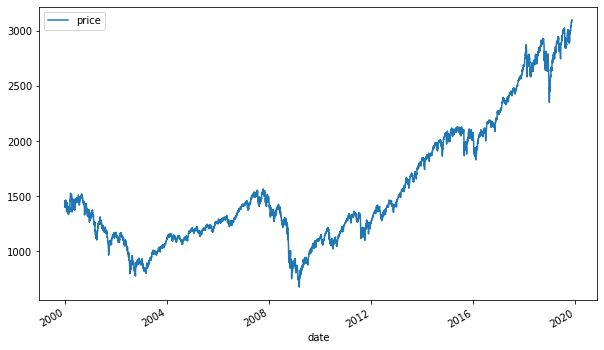

In [40]:
data_frame.plot(x="date", y="price", figsize = (10, 6))